In [1]:
#Add magic inline command
%matplotlib inline
#Dependencies and set-up
import matplotlib.pyplot as plt
import pandas as pd
import os 
import scipy.stats as sts
import numpy as np

In [2]:
#Files to Load
city_data_to_load=os.path.join("Resources","city_data.csv")
ride_data_to_load=os.path.join("Resources","ride_data.csv")

In [3]:
#read the citry data file and transform it intro a DF
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#Read the ride data and store it in a DF
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
#Inspect city data
city_data_df.isnull().sum()
#Check data type
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
#Check how many data points there are for type
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
#Get the number of data points from the urban cities
sum(city_data_df["type"]=="Urban")

66

In [8]:
#Get the number of data points from the Suburban cities
sum(city_data_df["type"]=="Suburban")

36

In [9]:
#Get the number of data points from the rural cities
sum(city_data_df["type"]=="Rural")

18

In [10]:
#inspect ride data
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
#Inspect ride data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
#Merge DataFrames
pyber_data_df=pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])
#Print head of DF
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [13]:
#Create urban df
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]

In [14]:
#create suburban df
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]

In [15]:
#create rural df
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]

In [16]:
#Calculate total ammount of rides
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]


In [17]:
#Calculate total suburban rides
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]

In [18]:
#Calculate total rural rides
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]

In [19]:
#get the avarega fare by city type
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]

In [20]:
#Calculate the average drivers by city type
urban_avg_drivers=urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_drivers=suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_avg_drivers=rural_cities_df.groupby(["city"]).mean()["driver_count"]
urban_avg_drivers.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

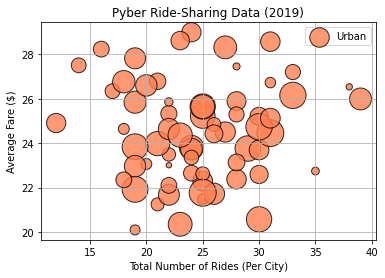

In [21]:
#Create the urban bubble chart
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_avg_drivers,c="coral",
           edgecolor="black",linewidths=1,
           alpha=0.8,label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend()
plt.grid(True)
plt.show()

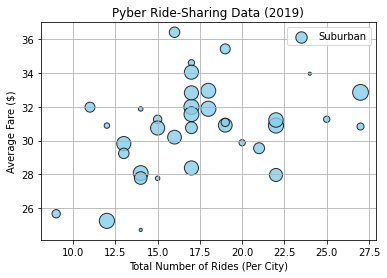

In [22]:
#Create suburban bubble chart
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_avg_drivers,c="skyblue",
           edgecolor="black",linewidths=1,
           alpha=0.8,label="Suburban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()
plt.show()

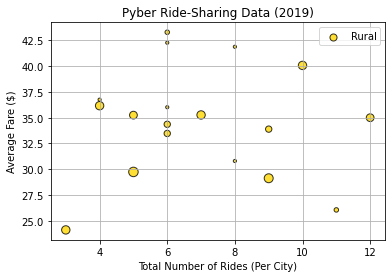

In [23]:
#Create the rural bubble chart
plt.scatter(rural_ride_count,
           rural_avg_fare,s=10*rural_avg_drivers,
           c="gold",edgecolor="black",linewidths=1,
           alpha=0.8,label="Rural")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()
plt.show()

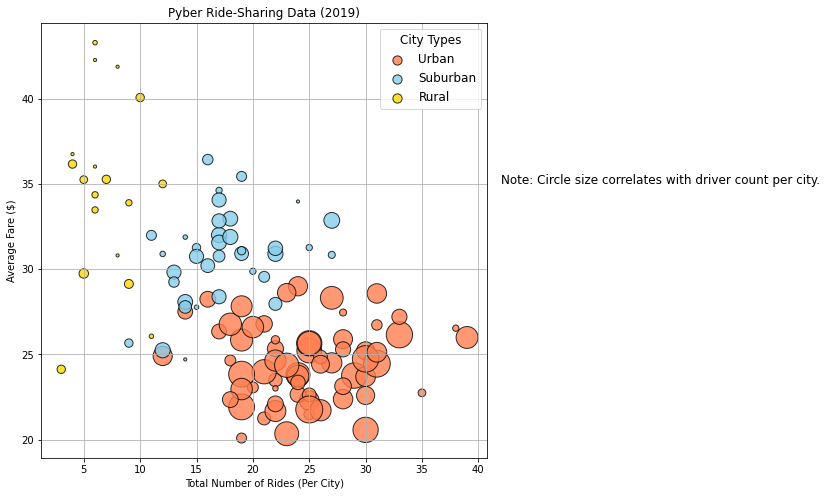

In [24]:
#Create the urban bubble chart
plt.figure(figsize=(8,8))
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_avg_drivers,c="coral",
           edgecolor="black",linewidths=1,
           alpha=0.8,label="Urban")
#Create suburban bubble chart
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_avg_drivers,c="skyblue",
           edgecolor="black",linewidths=1,
           alpha=0.8,label="Suburban")
#Create the rural bubble chart
plt.scatter(rural_ride_count,
           rural_avg_fare,s=10*rural_avg_drivers,
           c="gold",edgecolor="black",linewidths=1,
           alpha=0.8,label="Rural")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
lgnd=plt.legend(fontsize="12",mode="Expanded",scatterpoints=1,loc="best",title="City Types")
lgnd.legendHandles[0]._sizes=[85]
lgnd.legendHandles[1]._sizes=[85]
lgnd.legendHandles[2]._sizes=[85]
lgnd.get_title().set_fontsize(12)
plt.text(42,35,"Note: Circle size correlates with driver count per city.",fontsize="12")
plt.savefig("analysis/fig1.png")
plt.show()

In [25]:
#Get summary statistics
urban_ride_count.describe()
suburban_ride_count.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [26]:
#Calculate mean rides
mean_urban_rides=urban_ride_count.mean()
mean_rural_rides=rural_ride_count.mean()
mean_suburban_rides=suburban_ride_count.mean()

In [27]:
#Calculate median rides
mdn_urban_rides=urban_ride_count.median()
mdn_suburban_rides=suburban_ride_count.median()
mdn_rural_rides=rural_ride_count.median()

In [28]:
#Calculate mode in ammount of rides
mode_urban_rides=urban_ride_count.mode()
mode_suburban_rides=suburban_ride_count.mode()
mode_rural_rides=rural_ride_count.mode()

In [29]:
#Calculate fare summary statistics urban
urban_fare=urban_cities_df["fare"]
mean_urban_fare=np.mean(urban_fare)
print(f"The mean fare for urban trip is:${mean_urban_fare:.2f}.")
median_urban_fare=np.median(urban_fare)
print(f"The median fare for urban trip is:${median_urban_fare:.2f}.")
mode_urban_fare=sts.mode(urban_fare)
print(f"The mode fare for urban trip is:{mode_urban_fare}.")

The mean fare for urban trip is:$24.53.
The median fare for urban trip is:$24.64.
The mode fare for urban trip is:ModeResult(mode=array([22.86]), count=array([5])).


In [30]:
#Calculate fare summary statistics suburban
suburban_fare=suburban_cities_df["fare"]
mean_suburban_fare=np.mean(suburban_fare)
print(f"The mean fare for suburban trip is:${mean_suburban_fare:.2f}.")
median_suburban_fare=np.median(suburban_fare)
print(f"The median fare for suburban trip is:${median_suburban_fare:.2f}.")
mode_suburban_fare=sts.mode(suburban_fare)
print(f"The mode fare for urban trip is:{mode_suburban_fare}.")

The mean fare for suburban trip is:$30.97.
The median fare for suburban trip is:$30.75.
The mode fare for urban trip is:ModeResult(mode=array([17.99]), count=array([3])).


In [31]:
#Calculate fare summary statistics rural
rural_fare=rural_cities_df["fare"]
mean_rural_fare=np.mean(rural_fare)
print(f"The mean fare for rural trip is:${mean_rural_fare:.2f}.")
median_rural_fare=np.median(rural_fare)
print(f"The median fare for rural trip is:${median_rural_fare:.2f}.")
mode_rural_fare=sts.mode(rural_fare)
print(f"The mode fare for rural trip is:{mode_rural_fare}.")

The mean fare for rural trip is:$34.62.
The median fare for rural trip is:$37.05.
The mode fare for rural trip is:ModeResult(mode=array([37.05]), count=array([2])).


In [32]:
#Calculate driver summary statistics urban
urban_drivers=urban_cities_df["driver_count"]
mean_urban_drivers=np.mean(urban_drivers)
print(f"The mean ammount of drivers for urban city is:{mean_urban_drivers:.0f}.")
median_urban_drivers=np.median(urban_drivers)
print(f"The median ammount of drivers for urban city is:{median_urban_drivers:.0f}.")
mode_urban_drivers=sts.mode(urban_drivers)
print(f"The mode ammount of drivers for urban city is:{mode_urban_drivers}.")

The mean ammount of drivers for urban city is:37.
The median ammount of drivers for urban city is:37.
The mode ammount of drivers for urban city is:ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [33]:
#Calculate driver summary statistics suburban
suburban_drivers=suburban_cities_df["driver_count"]
mean_suburban_drivers=np.mean(suburban_drivers)
print(f"The mean ammount of drivers for suburban city is:{mean_suburban_drivers:.0f}.")
median_suburban_drivers=np.median(suburban_drivers)
print(f"The median ammount of drivers for suburban city is:{median_suburban_drivers:.0f}.")
mode_suburban_drivers=sts.mode(suburban_drivers)
print(f"The mode ammount of drivers for suburban city is:{mode_suburban_drivers}.")

The mean ammount of drivers for suburban city is:14.
The median ammount of drivers for suburban city is:16.
The mode ammount of drivers for suburban city is:ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [34]:
#Calculate driver summary statistics rural
rural_drivers=rural_cities_df["driver_count"]
mean_rural_drivers=np.mean(rural_drivers)
print(f"The mean ammount of drivers for rural city is:{mean_rural_drivers:.0f}.")
median_rural_drivers=np.median(rural_drivers)
print(f"The median ammount of drivers for rural city is:{median_rural_drivers:.0f}.")
mode_rural_drivers=sts.mode(rural_drivers)
print(f"The mode ammount of drivers for rural city is:{mode_rural_drivers}.")

The mean ammount of drivers for rural city is:4.
The median ammount of drivers for rural city is:4.
The mode ammount of drivers for rural city is:ModeResult(mode=array([1], dtype=int64), count=array([32])).


<function matplotlib.pyplot.show(close=None, block=None)>

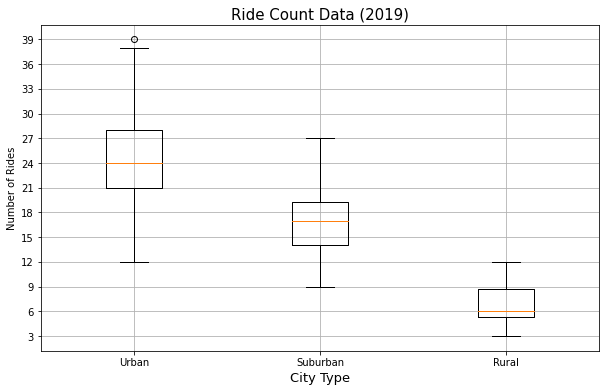

In [35]:
#box and whiskers ride counts
x_labels=["Urban","Suburban","Rural"]
ride_count_data=[urban_ride_count, suburban_ride_count, rural_ride_count]
fif,ax=plt.subplots(figsize=(10,6))
ax.set_xlabel("City Type",fontsize="13")
ax.set_ylabel("Number of Rides")
ax.set_title("Ride Count Data (2019)",fontsize="15")
ax.set_yticks(np.arange(0,45,step=3))
ax.boxplot(ride_count_data,labels=x_labels)
ax.grid()
#save the figure
plt.savefig("analysis/Fig2.png")
plt.show

In [36]:
#Get the Urban outlier
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} hast the highest rider count.")

West Angela hast the highest rider count.


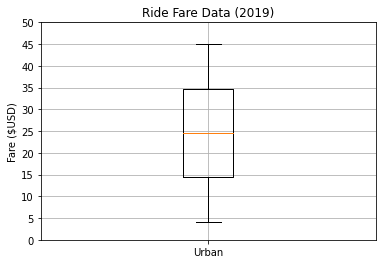

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [37]:
#Box and whispers plot ride fare data urban
urban_fares=urban_cities_df["fare"]
x_label=["Urban"]
fig,ax=plt.subplots()
ax.boxplot(urban_fares,labels=x_label)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step=5))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

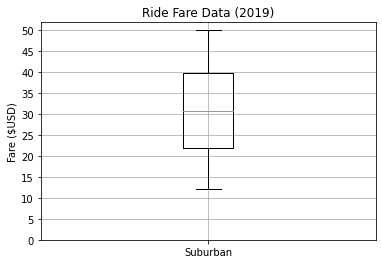

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [38]:
#Box and whispers plot ride fare data urban
suburban_fares=suburban_cities_df["fare"]
x_label=["Suburban"]
fig,ax=plt.subplots()
ax.boxplot(suburban_fares,labels=x_label)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step=5))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

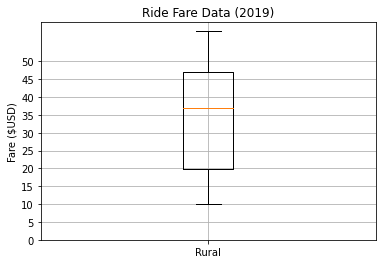

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [39]:
#Box and whispers plot ride fare data rural
rural_fares=rural_cities_df["fare"]
x_label=["Rural"]
fig,ax=plt.subplots()
ax.boxplot(rural_fares,labels=x_label)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step=5))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

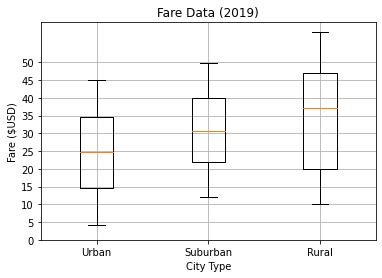

In [40]:
#United Box and Whiskers plot
x_labels=["Urban","Suburban","Rural"]
fare_data=[urban_fares,suburban_fares,rural_fares]
fig,ax=plt.subplots()
ax.boxplot(fare_data,labels=x_labels)
ax.set_xlabel("City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_title("Fare Data (2019)")
ax.set_yticks(np.arange(0,51,step=5))
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()

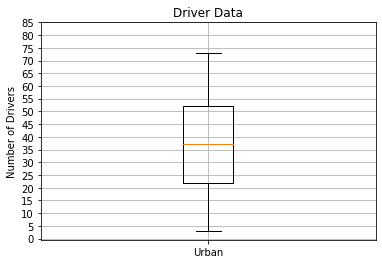

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [41]:
#Crate Box and Whiskers driver data urban
urban_drivers=urban_cities_df["driver_count"]
x_label=["Urban"]
fig,ax=plt.subplots()
ax.boxplot(urban_drivers,labels=x_label)
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90,step=5))
ax.set_title("Driver Data")
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

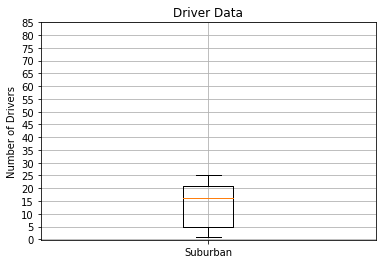

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [42]:
#Crate Box and Whiskers driver data suburban
suburban_drivers=suburban_cities_df["driver_count"]
x_label=["Suburban"]
fig,ax=plt.subplots()
ax.boxplot(suburban_drivers,labels=x_label)
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90,step=5))
ax.set_title("Driver Data")
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

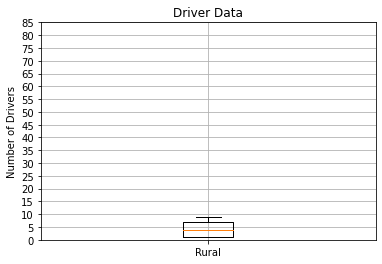

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [43]:
#Crate Box and Whiskers driver data rural
rural_drivers=rural_cities_df["driver_count"]
x_label=["Rural"]
fig,ax=plt.subplots()
ax.boxplot(rural_drivers,labels=x_label)
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90,step=5))
ax.set_title("Driver Data")
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

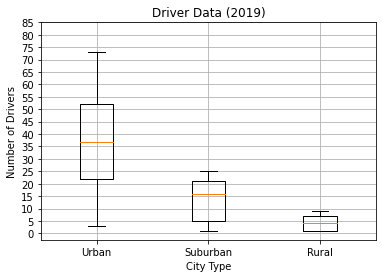

In [44]:
#Combine the boxplots
driver_data=[urban_drivers,suburban_drivers,rural_drivers]
x_labels_drivers=["Urban","Suburban",""]
fig,ax=plt.subplots()
ax.boxplot(driver_data,labels=x_labels)
ax.set_xlabel("City Type")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90,step=5))
ax.set_title("Driver Data (2019)")
ax.grid()
plt.savefig("analysis/Fig4.png")
plt.show()

In [47]:
#Get the total fare by city type
sum_fares_by_type=pyber_data_df.groupby(["type"]).sum()["fare"]

In [49]:
#Get the total ammount of fares
total_fares=pyber_data_df.sum()["fare"]

In [50]:
#Calculate the % of fares
type_percents=sum_fares_by_type/total_fares *100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

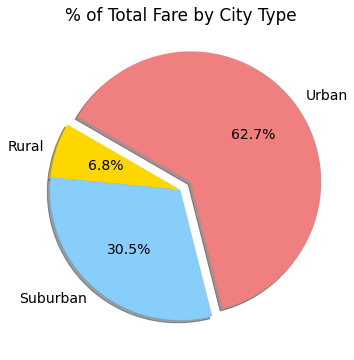

In [55]:
import matplotlib as mpl
#Create a pie chart of the fares data
plt.subplots(figsize=(10,6))
plt.pie(type_percents,
       labels=["Rural","Suburban","Urban"],
       colors=["gold","lightskyblue","lightcoral"],
       explode=[0,0,0.1],
        autopct="%1.1f%%",
        shadow=True,startangle=150)
plt.title("% of Total Fare by City Type")
#change fontsize
mpl.rcParams['font.size']=14
plt.savefig("analysis/Fig5.png")
plt.show()


In [60]:
#Get the % of rides by city type
ride_percents=pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df["ride_id"].count() * 100
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

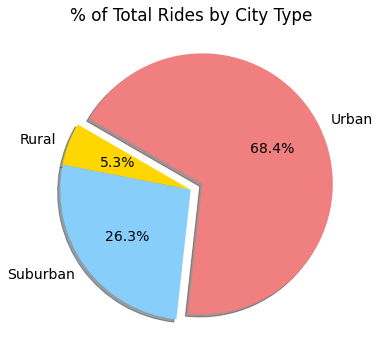

In [61]:
#Create a pie chart of the total rides data
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
       labels=["Rural","Suburban","Urban"],
       colors=["gold","lightskyblue","lightcoral"],
       explode=[0,0,0.1],
        autopct="%1.1f%%",
        shadow=True,startangle=150)
plt.title("% of Total Rides by City Type")
#change fontsize
mpl.rcParams['font.size']=14
plt.savefig("analysis/Fig6.png")
plt.show()

In [65]:
#Get the % of Drivers by city type
driver_percents=city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df["driver_count"].sum() * 100
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

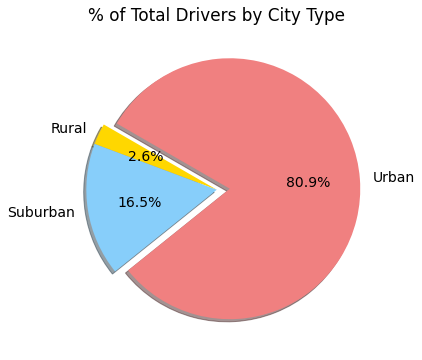

In [66]:
#Create a pie chart of the total rides data
plt.subplots(figsize=(10,6))
plt.pie(driver_percents,
       labels=["Rural","Suburban","Urban"],
       colors=["gold","lightskyblue","lightcoral"],
       explode=[0,0,0.1],
        autopct="%1.1f%%",
        shadow=True,startangle=150)
plt.title("% of Total Drivers by City Type")
#change fontsize
mpl.rcParams['font.size']=14
plt.savefig("analysis/Fig7.png")
plt.show()